In [1]:
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline

In [2]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


#predict_step(['doctor.e16ba4e4.jpg']) # ['a woman in a hospital bed with a woman in a hospital bed']



In [3]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\dma\anaconda3\envs\VRL_TF_GPU\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
C:\Users\dma\anaconda3\envs\VRL_TF_GPU\lib\site-packages\transformers\generation\utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

### For batch processing our images

In [4]:
import os;
import time;

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5ADA-A407

 Directory of C:\Users\dma\Downloads\VRL_DB

07/07/2023  03:36 PM    <DIR>          .
07/07/2023  03:36 PM    <DIR>          ..
05/15/2023  03:54 PM    <DIR>          .ipynb_checkpoints
05/03/2023  05:28 PM    <DIR>          A08-077
05/03/2023  05:17 PM       337,099,045 A08-077.zip
07/07/2023  03:36 PM            69,378 A08-077_data.csv
05/13/2023  08:44 PM    <DIR>          clip-interrogator
05/13/2023  04:13 PM             7,775 environment.yml
05/13/2023  04:07 PM                 0 environment_VRL_DB.yml
05/31/2023  03:34 PM            37,963 Untitled.ipynb
05/15/2023  05:06 PM    <DIR>          vit-gpt2-coco-en-ckpts
05/31/2023  01:33 PM    <DIR>          vit-gpt2-image-captioning
               5 File(s)    337,214,161 bytes
               7 Dir(s)  1,341,209,018,368 bytes free


In [6]:
!cd vit-gpt2-image-captioning/Data

 Volume in drive C has no label.
 Volume Serial Number is 5ADA-A407

 Directory of C:\Users\dma\Downloads\VRL_DB

05/31/2023  01:34 PM    <DIR>          .
05/31/2023  01:34 PM    <DIR>          ..
05/15/2023  03:54 PM    <DIR>          .ipynb_checkpoints
05/03/2023  05:28 PM    <DIR>          A08-077
05/03/2023  05:17 PM       337,099,045 A08-077.zip
05/13/2023  08:44 PM    <DIR>          clip-interrogator
05/13/2023  04:13 PM             7,775 environment.yml
05/13/2023  04:07 PM                 0 environment_VRL_DB.yml
05/31/2023  01:34 PM             6,053 Untitled.ipynb
05/15/2023  05:06 PM    <DIR>          vit-gpt2-coco-en-ckpts
05/31/2023  01:33 PM    <DIR>          vit-gpt2-image-captioning
               4 File(s)    337,112,873 bytes
               7 Dir(s)  1,418,906,587,136 bytes free


In [7]:
# hardcoding the path; might be different in different environments!!!
Path = 'vit-gpt2-image-captioning\Data'

In [8]:
# test
test_img = [Path + '\\' + os.listdir(Path)[826]]
test_img

['vit-gpt2-image-captioning\\Data\\A08-077-0900.jpg']

In [9]:
predict_step(test_img)


['a painting of a woman sitting on a wooden bench']

### Tests run successfully, going to try pretraining the model(s) to get desired results

#### 1) extract labels from sql database entry(ies) associated with each image 

In [10]:
import pymysql as psql;

In [12]:
'''
connection = psql.connect(host='cha-cdbs-e01.sjsu.edu',
                          user='bob', 
                          password='OLIO56',
                          database='vrl_images',
                          charset='utf8mb4',
                          cursorclass=psql.cursors.DictCursor)
'''

"\nconnection = psql.connect(host='cha-cdbs-e01.sjsu.edu',\n                          user='bob', \n                          password='OLIO56',\n                          database='vrl_images',\n                          charset='utf8mb4',\n                          cursorclass=psql.cursors.DictCursor)\n"

In [13]:
#!conda list

In [14]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5ADA-A407

 Directory of C:\Users\dma\Downloads\VRL_DB

07/07/2023  03:43 PM    <DIR>          .
07/07/2023  03:43 PM    <DIR>          ..
05/15/2023  03:54 PM    <DIR>          .ipynb_checkpoints
05/03/2023  05:28 PM    <DIR>          A08-077
05/03/2023  05:17 PM       337,099,045 A08-077.zip
07/07/2023  03:36 PM            69,378 A08-077_data.csv
05/13/2023  08:44 PM    <DIR>          clip-interrogator
05/13/2023  04:13 PM             7,775 environment.yml
05/13/2023  04:07 PM                 0 environment_VRL_DB.yml
07/07/2023  03:43 PM            10,140 Untitled.ipynb
05/15/2023  05:06 PM    <DIR>          vit-gpt2-coco-en-ckpts
05/31/2023  01:33 PM    <DIR>          vit-gpt2-image-captioning
               5 File(s)    337,186,338 bytes
               7 Dir(s)  1,341,204,508,672 bytes free


In [15]:
df = pd.read_csv('A08-077_data.csv');
df

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,NaN,NaN,NaN,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,NaN,NaN,NaN,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,NaN,NaN,NaN,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,NaN,NaN,NaN,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,NaN,NaN,NaN,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison
...,...,...,...,...,...,...,...,...,...
723,A08-077-1189.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
724,A08-077-1190.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
725,A08-077-1191.jpg,Gu Wenda,NaN,NaN,United Nations - Babel of the Millennium,NaN,Chinese,1999,NaN
726,A08-077-1194.jpg,"Chicago, Judy (Cohen, Judy)",NaN,NaN,The Dinner Party,Feminist,American,1974-1979,Mary Wollestonecraft


In [16]:
df.shape

(728, 9)

In [18]:
df.columns

Index(['image_filename', 'agents::agent_name', 'agents 2::agent_name',
       'works::work_display_attribution', 'works::work_title',
       'works::work_style', 'works::work_culture', 'works::work_date',
       'image_description'],
      dtype='object')

Now that we have the dataset, let's cross reference the images that we DO have the data for and try to train + run the model on that.

# Exploratory Data Analysis

Since the image files that we have is 1122 and the image files contained in our dataset are about 728, we can break down the project's first phase into the following tasks:<br>
<t>~~- cross reference image file names with file names in dataset~~<br>
<t>~~- remove redundant columns such as job specific agent columns~~<br>
<t>- concatenate the descriptive words to train the model. Discussions to be had regarding this <br>
    &nbsp;&nbsp;&nbsp;* Multiple NNs working simultaneously to generate feature specific labels? (i.e. change the target variable for training to alterative features and make multiple &nbsp;&nbsp;&nbsp;&nbsp; models)<br>
    &nbsp;&nbsp;&nbsp;* Make the model predict all keywords in a concatenated string <br>
    &nbsp;&nbsp;&nbsp;* Misc. : NLP n-gram approaches for artist-based categorization of works??<br>

## dataframe data breakdown

In [23]:
df.head()

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,NaN,NaN,NaN,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,NaN,NaN,NaN,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,NaN,NaN,NaN,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,NaN,NaN,NaN,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,NaN,NaN,NaN,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   image_filename                   728 non-null    object
 1   agents::agent_name               411 non-null    object
 2   agents 2::agent_name             33 non-null     object
 3   works::work_display_attribution  26 non-null     object
 4   works::work_title                728 non-null    object
 5   works::work_style                596 non-null    object
 6   works::work_culture              700 non-null    object
 7   works::work_date                 671 non-null    object
 8   image_description                190 non-null    object
dtypes: object(9)
memory usage: 51.3+ KB


In [26]:
df.describe()

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
count,728,411,33,26,728,596,700,671,190
unique,728,290,21,3,605,120,61,490,152
top,A08-077-0001.jpg,"Weyden, Rogier van der","Eyck, Hubert van",(attributed to),Beaune (Last Judgment) Altarpiece,Renaissance,Italian,c. 1450,Reconstruction
freq,1,11,7,19,8,80,100,9,10


Text(0.5, 1.0, 'Visual representation of null values in dataset')

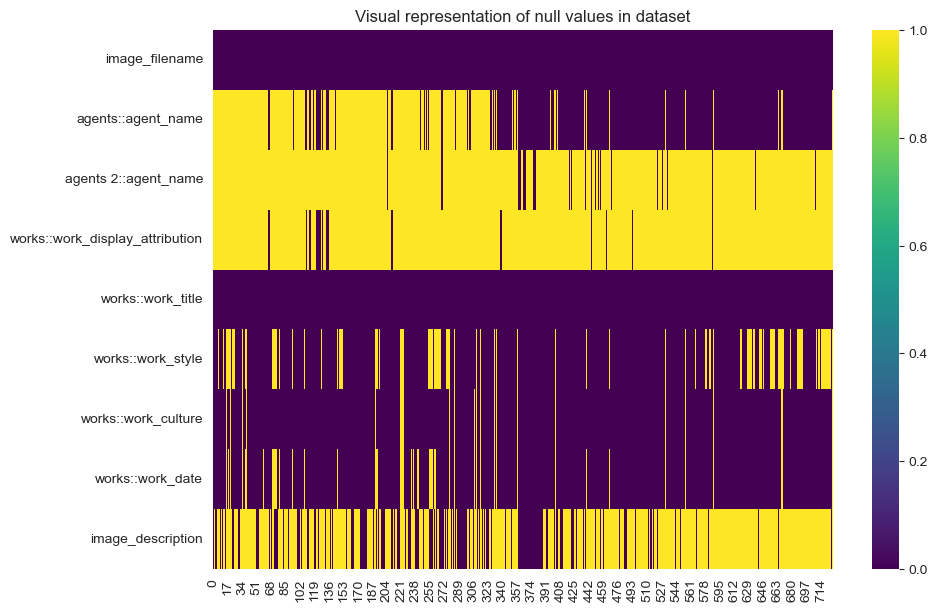

In [28]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull().transpose(), cmap = 'viridis')
plt.title('Visual representation of null values in dataset')

In [30]:
df['works::work_display_attribution'].value_counts()

(attributed to)       19
(from a design by)     5
(copy after)           2
Name: works::work_display_attribution, dtype: int64

In [32]:
df[df['works::work_display_attribution'] == '(from a design by)']

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
337,A08-077-0539.jpg,Arnolfo di Cambio,NaN,(from a design by),Florence Cathedral (Santa Maria del Fiore),Gothic,Italian,1296 - 1350,NaN
338,A08-077-0540.jpg,Arnolfo di Cambio,NaN,(from a design by),Florence Cathedral (Santa Maria del Fiore),Gothic,Italian,1296 - 1350,NaN
444,A08-077-0696.jpg,"Aelst, Pieter van, the younger","Raphael (Sanzio, Raphael)",(from a design by),Miraculous Draft of Fishes,Renaissance,Flemish,1515-1516,NaN
462,A08-077-0739.jpg,"Buonarroti, Michelangelo",NaN,(from a design by),Saint Peter's Basilica,Renaissance,Italian,c. 1546-1564,NaN
586,A08-077-1013.jpg,"Cousen, John","Turner, Joseph Mallord William",(from a design by),Hannibal Crossing the Alps,Romantic,English,1859,NaN


Text(0.5, 1.0, 'Number of items in each work style category')

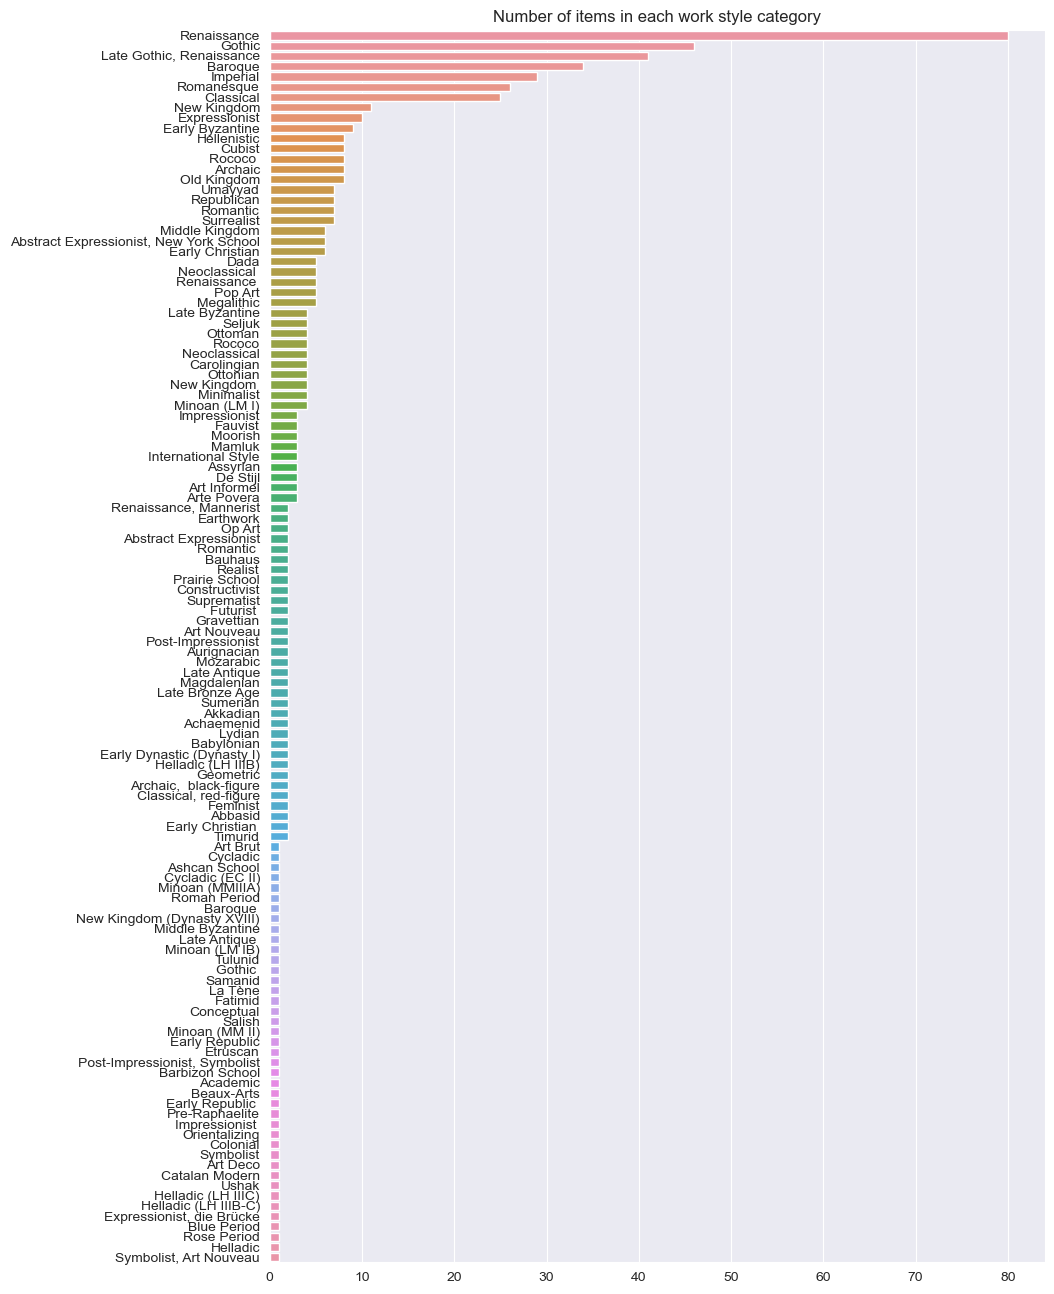

In [54]:
plt.figure(figsize = (10, 16))
sns.barplot(y = df['works::work_style'].value_counts().index, x = df['works::work_style'].value_counts().values)
plt.title('Number of items in each work style category')


Text(0.5, 1.0, 'Number of items in each work culture category')

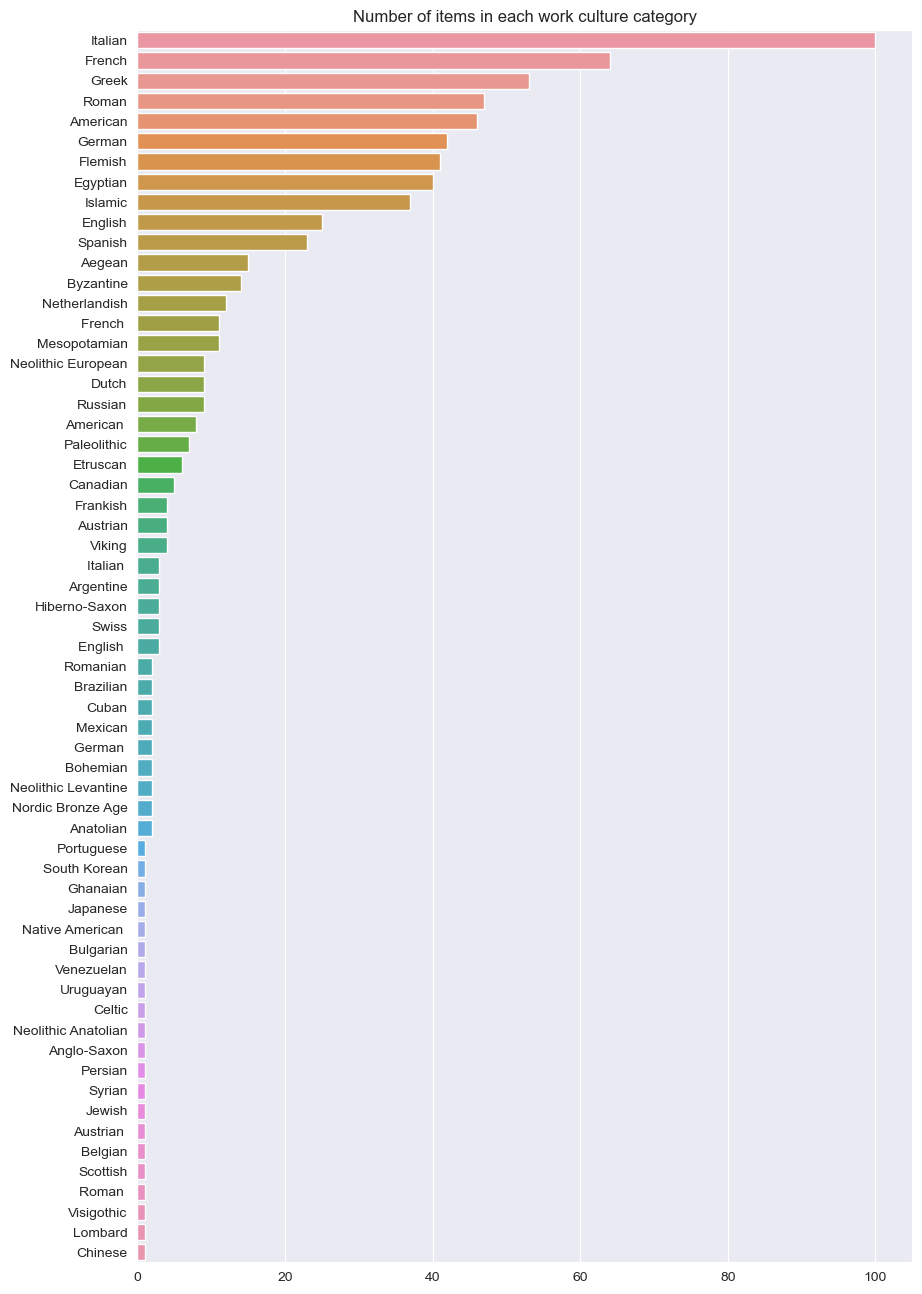

In [55]:
plt.figure(figsize = (10, 16))
sns.barplot(y = df['works::work_culture'].value_counts().index, x = df['works::work_culture'].value_counts().values)
plt.title('Number of items in each work culture category')


In [106]:
#plt.figure(figsize = (10, 16))
#sns.barplot(y = df['works::work_date'].value_counts().index, x = df['works::work_date'].value_counts().values)
#plt.title('Number of items in each work-date category')
df['works::work_date'].value_counts()

c. 1450           9
completed 1432    7
1498              6
1308-1311         5
begun 1220        4
                 ..
c. 1140           1
c. 996            1
961-973           1
c. 1125-50        1
1974-1979         1
Name: works::work_date, Length: 490, dtype: int64

### cross reference image file names with file names in dataset

In [59]:
df['image_filename'].head()

0    A08-077-0001.jpg
1    A08-077-0003.jpg
2    A08-077-0005.jpg
3    A08-077-0007.jpg
4    A08-077-0011.jpg
Name: image_filename, dtype: object

In [64]:
#Path + '\\' + os.listdir(Path)[826]
image_files = pd.DataFrame(os.listdir(Path));
image_files.columns = ['image_filename'];
image_files

,image_filename
0,A08-077-0001.jpg
1,A08-077-0003.jpg
2,A08-077-0005.jpg
3,A08-077-0007.jpg
4,A08-077-0011.jpg
...,...
1117,A08-077-1191.jpg
1118,A08-077-1192.jpg
1119,A08-077-1193.jpg
1120,A08-077-1194.jpg


In [65]:
pd.merge(left = df['image_filename'], right = image_files, how = 'inner')

,image_filename
0,A08-077-0001.jpg
1,A08-077-0003.jpg
2,A08-077-0005.jpg
3,A08-077-0007.jpg
4,A08-077-0011.jpg
...,...
723,A08-077-1189.jpg
724,A08-077-1190.jpg
725,A08-077-1191.jpg
726,A08-077-1194.jpg


In [98]:
df['image_filename'].isin(image_files['image_filename']).sum()

728

In [87]:
from tqdm import tqdm

In [86]:
image_files['image_filename'] = image_files['image_filename'].apply(lambda x: str(x))

In [94]:
image_files['image_filename'][0] == df['image_filename'][0]

True

In [103]:
df[df['image_filename'].isin(image_files['image_filename'])]

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,NaN,NaN,NaN,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,NaN,NaN,NaN,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,NaN,NaN,NaN,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,NaN,NaN,NaN,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,NaN,NaN,NaN,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison
...,...,...,...,...,...,...,...,...,...
723,A08-077-1189.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
724,A08-077-1190.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
725,A08-077-1191.jpg,Gu Wenda,NaN,NaN,United Nations - Babel of the Millennium,NaN,Chinese,1999,NaN
726,A08-077-1194.jpg,"Chicago, Judy (Cohen, Judy)",NaN,NaN,The Dinner Party,Feminist,American,1974-1979,Mary Wollestonecraft


In [111]:
images_not_in_df = image_files[image_files['image_filename'].isin(df['image_filename']).apply(lambda x: not x)];
images_not_in_df

,image_filename
148,A08-077-0222.jpg
150,A08-077-0224.jpg
152,A08-077-0226.jpg
153,A08-077-0227.jpg
160,A08-077-0234.jpg
...,...
1107,A08-077-1181.jpg
1108,A08-077-1182.jpg
1109,A08-077-1183.jpg
1118,A08-077-1192.jpg


### remove redundant columns such as job specific agent columns

In [114]:
df.head()
df.columns

Index(['image_filename', 'agents::agent_name', 'agents 2::agent_name',
       'works::work_display_attribution', 'works::work_title',
       'works::work_style', 'works::work_culture', 'works::work_date',
       'image_description'],
      dtype='object')

In [116]:
df = df.drop(['agents::agent_name', 'agents 2::agent_name', 'works::work_display_attribution'], axis = 1);
df.head()

,image_filename,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison
